In [1]:
import pandas as pd

import warnings

warnings.filterwarnings('ignore')

In [2]:
df_Turing422 = pd.read_csv('BeCode_Charleroi_Turing_422.csv') 

In [3]:
df_Turing422.head()

,AuthorID,Author,Date,Content,Attachments,Reactions
0,587733361574019094,Deadbool#9700,10-Aug-20 12:07 PM,Agenda des turing 4.22\nhttps://calendar.googl...,NaN,NaN
1,587733361574019094,Deadbool#9700,10-Aug-20 12:07 PM,Pinned a message.,NaN,NaN
2,587733361574019094,Deadbool#9700,10-Aug-20 12:07 PM,Github des turing 4.22 :\nhttps://github.com/b...,NaN,NaN
3,587733361574019094,Deadbool#9700,10-Aug-20 12:08 PM,Pinned a message.,NaN,NaN
4,712279385926795275,Odile#8182,10-Aug-20 12:42 PM,"Hello, I'm a bot and my name is Odile. I will ...",NaN,NaN


In [4]:
df_Turing422.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   AuthorID     2888 non-null   int64 
 1   Author       2888 non-null   object
 2   Date         2888 non-null   object
 3   Content      2797 non-null   object
 4   Attachments  143 non-null    object
 5   Reactions    527 non-null    object
dtypes: int64(1), object(5)
memory usage: 135.5+ KB


In [5]:
df_Turing422.isna().sum()

AuthorID          0
Author            0
Date              0
Content          91
Attachments    2745
Reactions      2361
dtype: int64

In [6]:
# dropping empty content rows

df_Turing422 = df_Turing422.dropna(subset=['Content'])

In [7]:
df_Turing422.head()

,AuthorID,Author,Date,Content,Attachments,Reactions
0,587733361574019094,Deadbool#9700,10-Aug-20 12:07 PM,Agenda des turing 4.22\nhttps://calendar.googl...,NaN,NaN
1,587733361574019094,Deadbool#9700,10-Aug-20 12:07 PM,Pinned a message.,NaN,NaN
2,587733361574019094,Deadbool#9700,10-Aug-20 12:07 PM,Github des turing 4.22 :\nhttps://github.com/b...,NaN,NaN
3,587733361574019094,Deadbool#9700,10-Aug-20 12:08 PM,Pinned a message.,NaN,NaN
4,712279385926795275,Odile#8182,10-Aug-20 12:42 PM,"Hello, I'm a bot and my name is Odile. I will ...",NaN,NaN


In [8]:
df_Turing422.isna().sum()

AuthorID          0
Author            0
Date              0
Content           0
Attachments    2744
Reactions      2283
dtype: int64

In [9]:
df_Turing422.Author.unique()

array(['Deadbool#9700', 'Odile#8182', 'Jean Christophe Meunier#8697',
       'Xavier#1632', 'Kiwii#5957', 'Kaiyung#6842',
       'Noah Alvarez Gonzalez#7344', 'Tamikara#4919', 'Zabzab#3333',
       'Maxime Dropsy#8807', 'leny#9107', 'Joffrey Bienvenu#5302',
       'Vincent Leurs#4535', 'David_Thewissen#7110', 'kaiyungtan#4047',
       'Corail31#4656', 'Allan Turing#0000', 'Alan Turing#0000',
       'tcrasset#4487', 'Alan Turing#1098', 'tamikabot#1527'],
      dtype=object)

In [10]:
df_Turing422 = df_Turing422[['Author','Content']]

In [11]:
pd.set_option('display.max_colwidth', None)

In [12]:
df_Turing422.head()

,Author,Content
0,Deadbool#9700,Agenda des turing 4.22\nhttps://calendar.google.com/calendar?cid=YmVjb2RlLm9yZ19jbGFzc3Jvb205MGY2YWIyZEBncm91cC5jYWxlbmRhci5nb29nbGUuY29t
1,Deadbool#9700,Pinned a message.
2,Deadbool#9700,Github des turing 4.22 :\nhttps://github.com/becodeorg/CRL-Turing-4-22
3,Deadbool#9700,Pinned a message.
4,Odile#8182,"Hello, I'm a bot and my name is Odile. I will accompany you throughout your training. \n\nFirst of all, welcome and congratulations on your selection. \n\nThen, I will ask you to put your first and last name in place of your nickname. It is important to be able to easily identify your contact person.\n\nI also wanted to draw your attention to the fact that this forum is and must remain professional. We are counting on you not to enter into heated debates on religion, sexual orientation or any other debate that does not include code or computers in general.\n\nEnjoy your training! \nhttps://media1.tenor.com/images/8c30bfd1084ea0b74015b89bc0a50454/tenor.gif?itemid=10883824"


In [13]:
df_Turing422.describe()

,Author,Content
count,2797,2797
unique,21,2307
top,Tamikara#4919,C'est le moment de pointer sur https://my.becode.org !\n @Zabzab @Tamikara
freq,418,48


### Cleaning the content

In [14]:
import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Downloaded Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adamtky/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/adamtky/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/adamtky/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Html tag removal

In [16]:
def html_removal(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

df_Turing422['Content'] = df_Turing422['Content'].apply(lambda x: html_removal(x))

In [17]:
df_Turing422.head()

,Author,Content
0,Deadbool#9700,Agenda des turing 4.22\nhttps://calendar.google.com/calendar?cid=YmVjb2RlLm9yZ19jbGFzc3Jvb205MGY2YWIyZEBncm91cC5jYWxlbmRhci5nb29nbGUuY29t
1,Deadbool#9700,Pinned a message.
2,Deadbool#9700,Github des turing 4.22 :\nhttps://github.com/becodeorg/CRL-Turing-4-22
3,Deadbool#9700,Pinned a message.
4,Odile#8182,"Hello, I'm a bot and my name is Odile. I will accompany you throughout your training. \n\nFirst of all, welcome and congratulations on your selection. \n\nThen, I will ask you to put your first and last name in place of your nickname. It is important to be able to easily identify your contact person.\n\nI also wanted to draw your attention to the fact that this forum is and must remain professional. We are counting on you not to enter into heated debates on religion, sexual orientation or any other debate that does not include code or computers in general.\n\nEnjoy your training! \nhttps://media1.tenor.com/images/8c30bfd1084ea0b74015b89bc0a50454/tenor.gif?itemid=10883824"


## replace contraction

In [18]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)


df_Turing422['Content'] = df_Turing422['Content'].apply(lambda x: replace_contractions(x))

In [19]:
df_Turing422.head()

,Author,Content
0,Deadbool#9700,Agenda des turing 4.22\nhttps://calendar.google.com/calendar?cid=YmVjb2RlLm9yZ19jbGFzc3Jvb205MGY2YWIyZEBncm91cC5jYWxlbmRhci5nb29nbGUuY29t
1,Deadbool#9700,Pinned a message.
2,Deadbool#9700,Github des turing 4.22 :\nhttps://github.com/becodeorg/CRL-Turing-4-22
3,Deadbool#9700,Pinned a message.
4,Odile#8182,"Hello, I am a bot and my name is Odile. I will accompany you throughout your training. \n\nFirst of all, welcome and congratulations on your selection. \n\nThen, I will ask you to put your first and last name in place of your nickname. It is important to be able to easily identify your contact person.\n\nI also wanted to draw your attention to the fact that this forum is and must remain professional. We are counting on you not to enter into heated debates on religion, sexual orientation or any other debate that does not include code or computers in general.\n\nEnjoy your training! \nhttps://media1.tenor.com/images/8c30bfd1084ea0b74015b89bc0a50454/tenor.gif?itemid=10883824"


## Remove the numbers

In [20]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

df_Turing422['Content'] = df_Turing422['Content'].apply(lambda x: remove_numbers(x))

In [21]:
df_Turing422.head()

,Author,Content
0,Deadbool#9700,Agenda des turing .\nhttps://calendar.google.com/calendar?cid=YmVjbRlLmyZjbGFzcJvbMGYYWIyZEBncmcCjYWxlbmRhcinbnbGUuYt
1,Deadbool#9700,Pinned a message.
2,Deadbool#9700,Github des turing . :\nhttps://github.com/becodeorg/CRL-Turing--
3,Deadbool#9700,Pinned a message.
4,Odile#8182,"Hello, I am a bot and my name is Odile. I will accompany you throughout your training. \n\nFirst of all, welcome and congratulations on your selection. \n\nThen, I will ask you to put your first and last name in place of your nickname. It is important to be able to easily identify your contact person.\n\nI also wanted to draw your attention to the fact that this forum is and must remain professional. We are counting on you not to enter into heated debates on religion, sexual orientation or any other debate that does not include code or computers in general.\n\nEnjoy your training! \nhttps://media.tenor.com/images/cbfdeabbbca/tenor.gif?itemid="


## word_tokenize

In [22]:
df_Turing422['Content'] = df_Turing422.apply(lambda row: nltk.word_tokenize(row['Content']), axis=1) 

In [23]:
df_Turing422.sample(10)

,Author,Content
86,Tamikara#4919,"[tu, avais, du, recevoir, une, invite, de, ludo, par, mail]"
2432,Vincent Leurs#4535,"[moi, aussi, ça, me, fait, ça, de, temps, en, temps, et, coïncidence, c'est, souvent, quand, mon, réveil, a, dérapé, 😄]"
992,Deadbool#9700,"[>, Je, devine, que, certains, d'entre, vous, n'ont, pas, suivi, les, recommandations, D'Alan, !, *, *, https, :, //my.becode.org, ., *, *, https, :, //gph.is/VPbeq, N'est, ce, pas, @, Maxime, Dropsy, et, @, Noah, Alvarez, Gonzalez, !]"
1487,Deadbool#9700,"[dir, (, )]"
2315,Vincent Leurs#4535,"[nikel, ,, tu, n'as, plus, qu, ', à, trouver, comment, remplacer, la, voix, 😜]"
2786,Vincent Leurs#4535,"[@, Deadbool, après, quelques, tests, supplémentaire, ,, j'en, arrive, toujours, à, la, conclusion, que, j'ai, une, erreur, de, shape, ., est-ce, qu'on, peut, regarder, ça, pendant, l'entretien, ?]"
156,Noah Alvarez Gonzalez#7344,"[@, Deadbool]"
1110,Vincent Leurs#4535,"[balance, ton, boulot]"
2085,Alan Turing#1098,"[Veille, démarre, dans, *, *, minutes, *, *, sur, *, *, Google, Meet, *, *, ., C'est, le, moment, de, pointer, sur, https, :, //my.becode.org, !, @, Joffrey, Bienvenu, @, Zabzab, @, Tamikara]"
872,Odile#8182,"[Ecoutez, mon, poto, Alan, ., https, :, //gph.is/UQ]"


In [24]:
stopwords = stopwords.words('french')

In [25]:
#stopwords.extend(['https','ca','cest'])

In [26]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words


def normalize(words):
    words = remove_non_ascii(words)
    words = remove_punctuation(words)
    words = to_lowercase(words)
    words = lemmatize_list(words)
    words = remove_stopwords(words)
    return ' '.join(words)

df_Turing422['Content'] = df_Turing422.apply(lambda row: normalize(row['Content']), axis=1)
df_Turing422.head()

,Author,Content
0,Deadbool#9700,agenda turing https calendargooglecomcalendar cidymvjbrllmyzjbgfzcjvbmgyywiyzebncmccjywxlbmrhcinbnbguuyt
1,Deadbool#9700,pin a message
2,Deadbool#9700,github turing https githubcombecodeorgcrlturing
3,Deadbool#9700,pin a message
4,Odile#8182,hello i be a bot and my name be odile i will accompany you throughout your train first of all welcome and congratulations your selection then i will ask you to put your first and last name in place of your nickname it be important to be able to easily identify your contact person i also want to draw your attention to the fact that this forum be and must remain professional we be count you not to enter into heat debate religion sexual orientation or any other debate that do not include code or computers in general enjoy your train https mediatenorcomimagescbfdeabbbcatenorgif itemid


In [27]:
import matplotlib.pyplot as plt

%matplotlib inline

from wordcloud import WordCloud
from wordcloud import STOPWORDS

def wordcloud(STOPWORDS):
    
    join_word = ' '.join(df_Turing422['Content'])
    wordcloud = WordCloud(stopwords = STOPWORDS,
                          background_color='black',
                          width=3000,
                          height=2500
                         ).generate(join_word)
    plt.figure(1,figsize=(12, 12))
    plt.imshow(wordcloud,interpolation='bilinear') #interpolation argument makes the word cloud appear more smoothly.)
    plt.axis('off')
    plt.show()

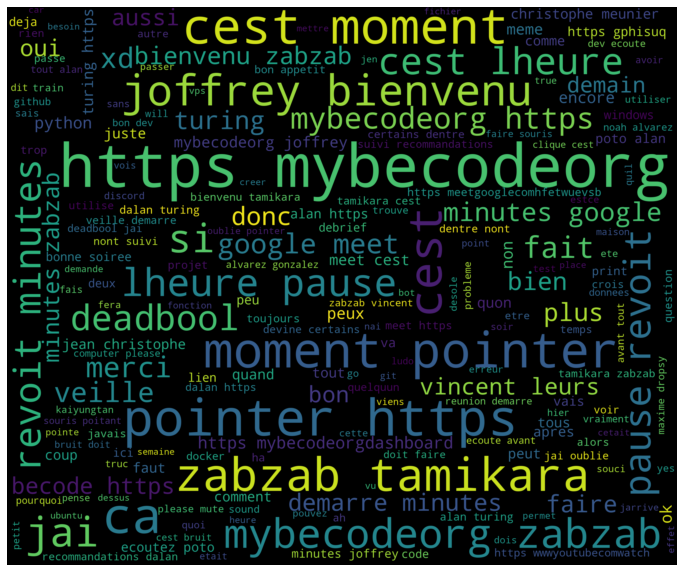

In [28]:
wordcloud(STOPWORDS)

In [29]:
df_Turing422.Author.unique()

array(['Deadbool#9700', 'Odile#8182', 'Jean Christophe Meunier#8697',
       'Xavier#1632', 'Kiwii#5957', 'Kaiyung#6842',
       'Noah Alvarez Gonzalez#7344', 'Tamikara#4919', 'Zabzab#3333',
       'Maxime Dropsy#8807', 'leny#9107', 'Joffrey Bienvenu#5302',
       'Vincent Leurs#4535', 'David_Thewissen#7110', 'kaiyungtan#4047',
       'Corail31#4656', 'Allan Turing#0000', 'Alan Turing#0000',
       'tcrasset#4487', 'Alan Turing#1098', 'tamikabot#1527'],
      dtype=object)

In [30]:
author = df_Turing422.Author.unique()

In [31]:
author_list =[]

for i in range(len(author)):

    name = author[i].split('#')[0]
    
    name = name.lower()
    name = name.split()
    author_list.append(name[0])
    
    try:
        author_list.append(name[1])
    except: None
    try:
        author_list.append(name[2])
    except: None

In [32]:
author_list

['deadbool',
 'odile',
 'jean',
 'christophe',
 'meunier',
 'xavier',
 'kiwii',
 'kaiyung',
 'noah',
 'alvarez',
 'gonzalez',
 'tamikara',
 'zabzab',
 'maxime',
 'dropsy',
 'leny',
 'joffrey',
 'bienvenu',
 'vincent',
 'leurs',
 'david_thewissen',
 'kaiyungtan',
 'corail31',
 'allan',
 'turing',
 'alan',
 'turing',
 'tcrasset',
 'alan',
 'turing',
 'tamikabot']

In [33]:
stop_words = ["https", "mybecodeorg", "ca","cest","jai",] + list(STOPWORDS) + author_list

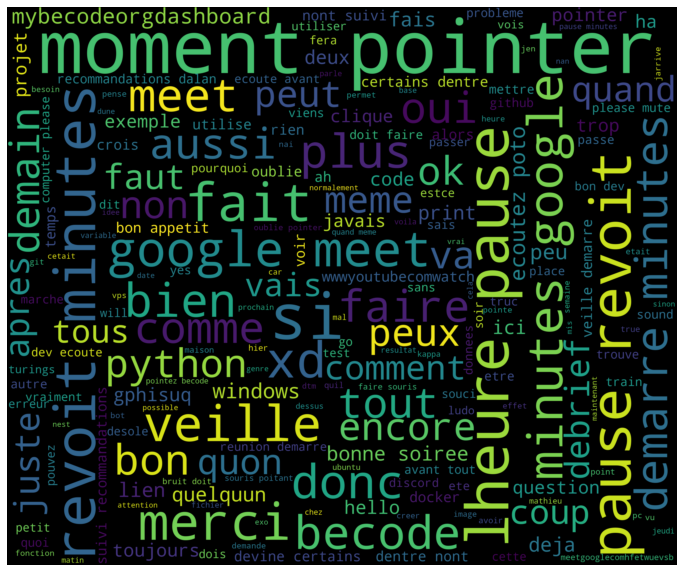

In [34]:
wordcloud(stop_words)

In [35]:
addition_list =['moment','pointer','google','meet','revoit','minutes','lheure','pause','veille','debrief','becode',\
                'donc','aussi','demarre','minutes','si','encore','comme','meme','fait','va']

In [36]:
stop_words = stop_words+addition_list

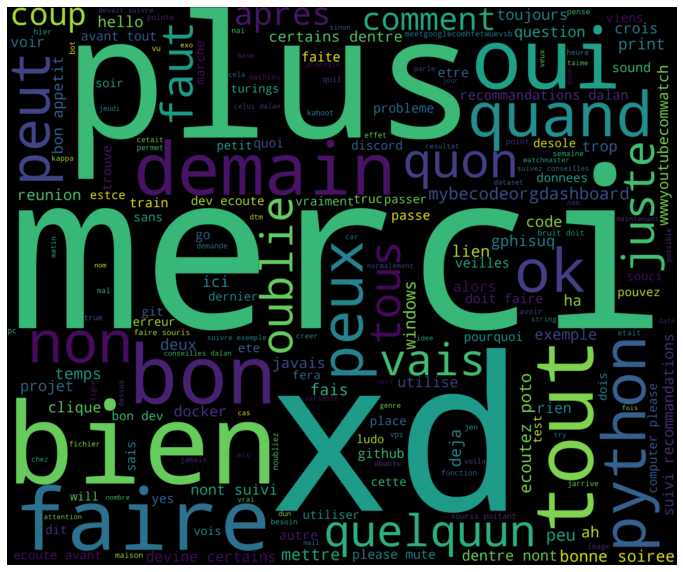

In [37]:
wordcloud(stop_words)

https://pypi.org/project/stop-words/#available-languages

In [38]:
from stop_words import get_stop_words

 
stop_words_french = get_stop_words('french')

In [39]:
stop_words = stop_words+stop_words_french

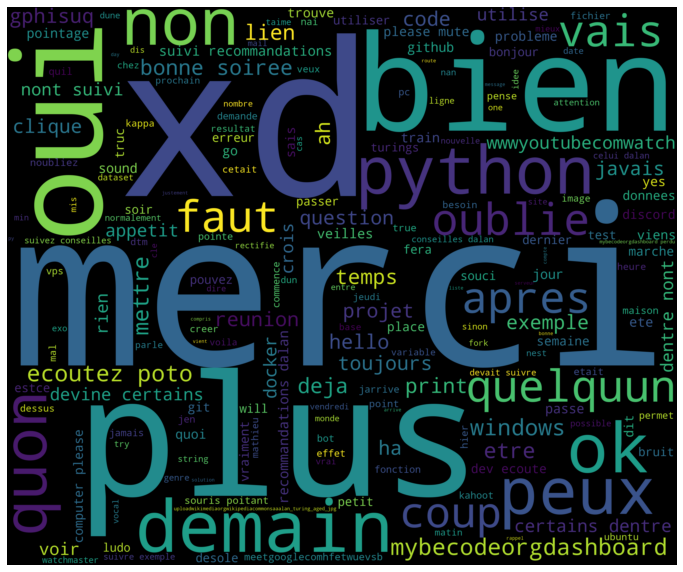

In [40]:
wordcloud(stop_words)